## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fitness and permutations

In [36]:
def clashes(poblacion):
    conflictos = 0
    for i in range(poblacion.shape[0]):
        for j in range(poblacion.shape[0]):
            if i != j:
                if poblacion[i] == poblacion[j]:
                    conflictos += 1
                if abs(i - j) == abs(poblacion[i] - poblacion[j]):
                    conflictos += 1
    return conflictos

def fitness(parents):
    return sorted(parents, key=lambda x: clashes(x))
    
def randomCrossOver(paths, mutationRate=0.1):
    index = np.random.randint(0, len(paths[0]), 2)
    selection = paths[0][index[0]:index[1]]
    mask = np.isin(paths[1], np.setdiff1d(paths[1], selection))
    return np.append(paths[1][mask], selection)

def crossOver(paths, totalPaths=10, mutationRate=0.6):
    newPaths = [paths[0]]
    for i in range(1, totalPaths):
        if np.random.random() < mutationRate:
            index = np.random.randint(0, len(paths), 2)
            newPaths.append(randomCrossOver([paths[index[0]], paths[index[1]]]))
    return newPaths

def mutation(paths, mutationRate=0.001):
    for i in range(1, len(paths)):
        if np.random.random() < mutationRate:
            index = np.random.randint(0, len(paths[0]), 2)
            paths[i][index[0]], paths[i][index[1]] = paths[i][index[1]], paths[i][index[0]]
    return paths

## Genetic Algorithm

In [37]:
def GeneticAlgorithm(parents, takebest=8, iteraciones=100):
    res = []
    for i in range(iteraciones):        
        parents = fitness(parents)        
        res.append([parents[0],clashes(parents[0])])
        if(clashes(parents[0]) == 0):
            break
        parents = crossOver(parents, takebest)
        parents = mutation(parents)
    df = pd.DataFrame(res, columns=['solucion', 'conflictos'])
    return fitness(parents), df 

<AxesSubplot:>

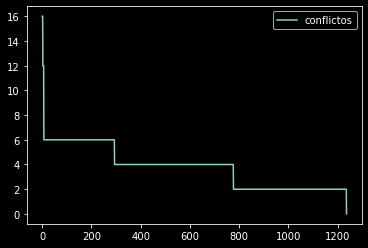

In [43]:
n = 16
positions = np.arange(n, dtype=int)
positions = [np.random.permutation(positions) for i in range(n)] 
positions

res ,df= GeneticAlgorithm(positions,takebest=n,iteraciones=10000)
df.plot()

In [44]:
df.tail()

,solucion,conflictos
1232,"[10, 12, 7, 11, 4, 1, 15, 8, 3, 13, 9, 5, 0, 14, 6, 2]",2
1233,"[10, 12, 7, 11, 4, 1, 15, 8, 3, 13, 9, 5, 0, 14, 6, 2]",2
1234,"[10, 12, 7, 11, 4, 1, 15, 8, 3, 13, 9, 5, 0, 14, 6, 2]",2
1235,"[10, 12, 7, 11, 4, 1, 15, 8, 3, 13, 9, 5, 0, 14, 6, 2]",2
1236,"[2, 0, 14, 6, 10, 12, 7, 11, 4, 1, 15, 8, 3, 13, 9, 5]",0


## Plotting the last solution

[ 2  0 14  6 10 12  7 11  4  1 15  8  3 13  9  5] 0


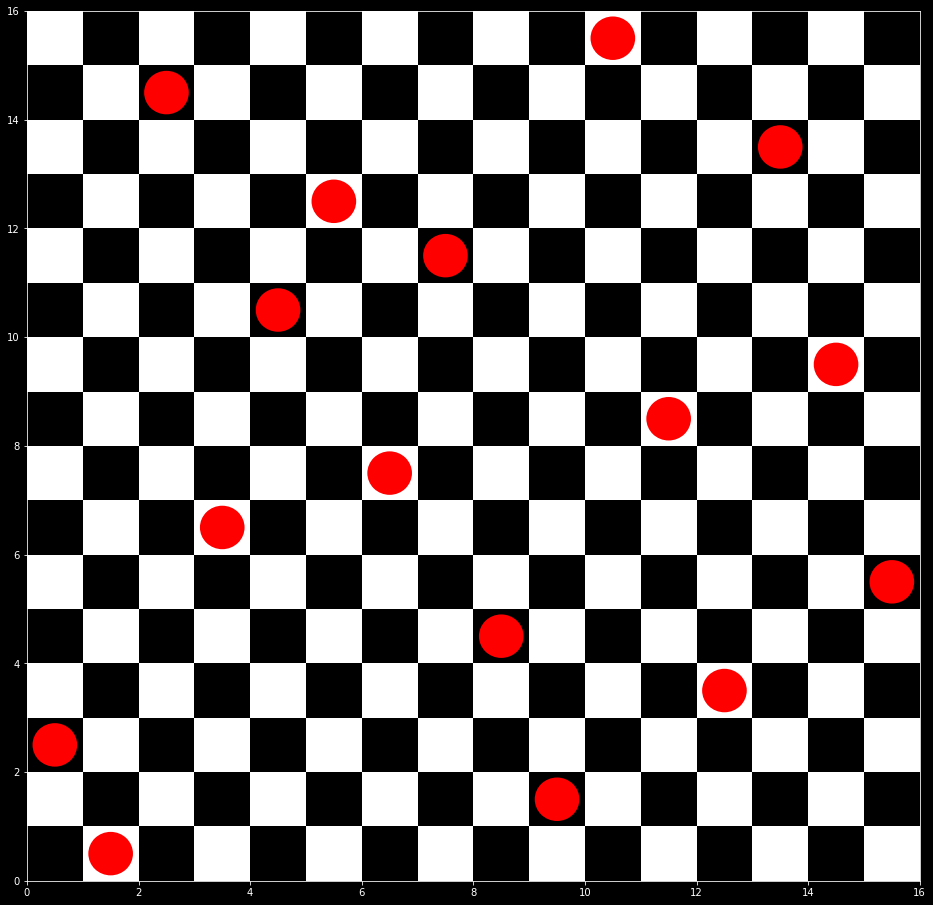

In [45]:
def plotsolution(solucion , n):
    fig = plt.figure(figsize=(n,n))
    ax = fig.add_subplot(111)
    ax.set_xlim(0,n)
    ax.set_ylim(0,n)

    for i in range(n):
        for j in range(n):
            if (i+j)%2==0:
                ax.add_patch(plt.Rectangle((i,j),1,1, facecolor='black'))
            else:
                ax.add_patch(plt.Rectangle((i,j),1,1, facecolor='white'))

    for i in range(n):
        ax.add_patch(plt.Circle((i+.5,solucion[0][i]+.5), 0.4, facecolor='firebrick'))

    plt.show()
print(res[0], clashes(res[0]))
plotsolution(res,n)